In [2]:
# Импортирум нужных нам библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import random
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    GridSearchCV
)
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report
)
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt


In [16]:
# Загружаем датасета breast_cancer
breast_cancer = load_breast_cancer()
breast_cancer_df = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
breast_cancer_df['target'] = breast_cancer.target

In [17]:
# Разделяем датасета на обучающую и тестовую выборки
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(
    breast_cancer_df.drop('target', axis=1),
    breast_cancer_df['target'],
    test_size=0.2,
    random_state=42
)

In [18]:
# Создаем классификатора на основе случайного леса
rf_bc = RandomForestClassifier(random_state=42)

# Обучение модели на обучающей выборке
rf_bc.fit(X_train_bc, y_train_bc)

# Предсказание классов для тестовой выборки
y_pred_bc = rf_bc.predict(X_test_bc)

In [19]:
# Оценка качества модели с помощью метрик
print('Показатель точности набора данных о раке молочной железы:', accuracy_score(y_test_bc, y_pred_bc))
print('Матрица путаницы для набора данных о раке молочной железы:\n', confusion_matrix(y_test_bc, y_pred_bc))
print('Отчет о классификации набора данных о раке молочной железы:\n', classification_report(y_test_bc, y_pred_bc))


Показатель точности набора данных о раке молочной железы: 0.9649122807017544
Матрица путаницы для набора данных о раке молочной железы:
 [[40  3]
 [ 1 70]]
Отчет о классификации набора данных о раке молочной железы:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [20]:
# Оценка модели
cv_scores = cross_val_score(rf_bc,breast_cancer_df.drop('target', axis=1), breast_cancer_df['target'], cv=5)
print('Оценки перекрестной проверки для датасета breast cancer:', cv_scores)


Оценки перекрестной проверки для датасета breast cancer: [0.92105263 0.93859649 0.98245614 0.96491228 0.97345133]


In [21]:
# Далее применяем решетчатого поиска для подбора оптимальных гиперпараметров модели
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 2, 4, 6, 8],
    'min_samples_split': [2, 4, 6, 8]
}
grid_search = GridSearchCV(rf_bc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_bc, y_train_bc)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 2, 4, 6, 8],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='accuracy')

In [22]:
print('Лучшие параметры для датасета breast cancer:', grid_search.best_params_)
print('Лучший результат для датасета breast cancer:', grid_search.best_score_)

Лучшие параметры для датасета breast cancer: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Лучший результат для датасета breast cancer: 0.9626373626373625


In [23]:
# Создание новой модели с оптимальными гиперпараметрами
rf_bc_opt = RandomForestClassifier(n_estimators=grid_search.best_params_['n_estimators'],
                                 max_depth=grid_search.best_params_['max_depth'],
                                 min_samples_split=grid_search.best_params_['min_samples_split'],
                                 random_state=42)

In [25]:
# Обучение новой модели на обучающей выборке
rf_bc_opt.fit(X_train_bc, y_train_bc)

# Предсказание классов для тестовой выборки
y_pred_bc_opt = rf_bc_opt.predict(X_test_bc)

In [26]:
# Оценка качества новой модели с помощью метрик
print('Оценка точности для датасета breast cancer (оптимизированная):', accuracy_score(y_test_bc, y_pred_bc_opt))
print('Матрица ошибок для датасета breast cancer (оптимизированная):\n', confusion_matrix(y_test_bc, y_pred_bc_opt))
print('Отчет о классификации для датасета breast cancer (оптимизированная):\n', classification_report(y_test_bc, y_pred_bc_opt))

Оценка точности для датасета breast cancer (оптимизированная): 0.9649122807017544
Матрица ошибок для датасета breast cancer (оптимизированная):
 [[40  3]
 [ 1 70]]
Отчет о классификации для датасета breast cancer (оптимизированная):
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



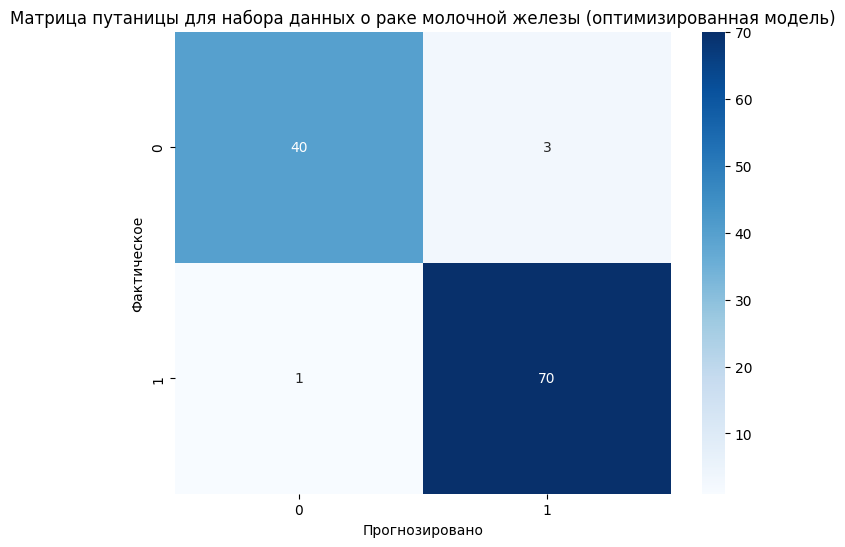

In [27]:
# Визуализация матрицы ошибок для оптимизированной модели
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_bc, y_pred_bc), annot=True, fmt='d', cmap='Blues')
plt.title('Матрица путаницы для набора данных о раке молочной железы (оптимизированная модель)')
plt.xlabel('Прогнозировано')
plt.ylabel('Фактическое')
plt.show()

In [4]:
#3
salary_list = [50000, 60000, 70000, 80000, 90000, 100000]
city_list = ['Германия', 'Кипр', 'Италия', 'США', 'Малазия', 'Корея']
age_list = list(range(30, 66))
gender_list = ['Female','Male']
vacation_prefer_list = ['Шопинг', 'Лыжи', 'Дайвинг', 'Путешествие', 'Сауна' ,'Пляжный отдых','Массаж', 'Пеший туризм', 'Культурный тур', 'Релакс']
transport_prefer_list = ['самолет', 'поезд', 'автобус', 'авто']
target_list = ['Малазия', 'Гоа', 'Дубай', 'Италия', 'Кипр','Сингапур','Канада','Франция', 'Австрия', 'Швейцария', 'ЕГИПЕТ', 'Мальдивы','Филиппины','США']

In [5]:
# Создаем пустой датафрейм с нужными колонками
vacation_df = pd.DataFrame(columns=['salary', 'city', 'age','gender', 'vacation_prefer', 'transport_prefer', 'target'])


In [6]:


for i in range(1000):
    salary = random.choice(salary_list)
    city = random.choice(city_list)
    age = random.randint(20, 65) if city != 'США' else random.randint(30, 65)
    gender = random.choice(gender_list)
    vacation_prefer = random.choice(vacation_prefer_list)
    transport_prefer = random.choice(transport_prefer_list)
    target = random.choice(target_list)

    if age > 58:
        if transport_prefer in ['самолет', 'Лыжи']:
            transport_prefer = random.choice(['поезд', 'автобус', 'авто'])

    if vacation_prefer == 'Шопинг' and gender == 'Female':
        temp_target_list = target_list.copy()
        if target in ['Малазия', 'Гоа']:
            temp_target_list = [t for t in temp_target_list if t not in ['Дубай', 'Италия','Франция','США']]
            target = random.choice(temp_target_list) if temp_target_list else ''

    if vacation_prefer == 'Лыжи':
        temp_target_list = target_list.copy()
        if target in ['Кипр','Италия', 'Дубай', 'Гоа','Сингапур','Малазия']:
            temp_target_list = [t for t in temp_target_list if t not in ['Канада','Франция', 'Австрия', 'Швейцария','США']]
            target = random.choice(temp_target_list) if temp_target_list else ''
    if vacation_prefer == 'Пеший туризм':
        temp_target_list = target_list.copy()
        if target in ['Кипр','Италия', 'Дубай', 'Гоа','Сингапур']:
            temp_target_list = [t for t in temp_target_list if t not in ['Канада','Франция', 'Австрия', 'Швейцария','США']]
            target = random.choice(temp_target_list) if temp_target_list else ''

    if vacation_prefer == 'Сауна' and gender == 'Мужской':
        target_list = ['Малазия', 'Гоа', 'Дубай', 'Кипр','Сингапур', 'ЕГИПЕТ', 'Мальдивы','Филиппины']  # Обновляем список таргетов
        target = random.choice(target_list) if target_list else ''

    vacation_df.loc[i] = [salary, city, age,gender, vacation_prefer, transport_prefer, target]
vacation_df.head(20)

,salary,city,age,gender,vacation_prefer,transport_prefer,target
0,60000,Кипр,41,Male,Пляжный отдых,авто,США
1,100000,США,42,Male,Культурный тур,поезд,Малазия
2,70000,Италия,61,Male,Шопинг,поезд,Канада
3,70000,Кипр,29,Male,Сауна,самолет,Италия
4,80000,США,54,Male,Релакс,поезд,Кипр
5,70000,США,63,Female,Дайвинг,авто,Мальдивы
6,90000,Малазия,56,Female,Культурный тур,поезд,Австрия
7,60000,США,52,Male,Культурный тур,автобус,Сингапур
8,80000,Италия,21,Female,Сауна,авто,Мальдивы
9,90000,Малазия,28,Female,Лыжи,автобус,Филиппины


In [7]:
# Приводим salary к типу float64 для удобства
vacation_df['salary'] = vacation_df['salary'].astype(float)
vacation_df.dtypes

# Просматриваем первые пять строк датафрейма
vacation_df.head()

,salary,city,age,gender,vacation_prefer,transport_prefer,target
0,60000.0,Кипр,41,Male,Пляжный отдых,авто,США
1,100000.0,США,42,Male,Культурный тур,поезд,Малазия
2,70000.0,Италия,61,Male,Шопинг,поезд,Канада
3,70000.0,Кипр,29,Male,Сауна,самолет,Италия
4,80000.0,США,54,Male,Релакс,поезд,Кипр


In [8]:
# Применяем функцию get_dummies к колонкам с категориальными данными
vacation_df = pd.get_dummies(vacation_df, columns=['city','gender', 'vacation_prefer', 'transport_prefer', 'target'])
# Просматриваем первые пять строк датафрейма
vacation_df.head()

,salary,age,city_Германия,city_Италия,city_Кипр,city_Корея,city_Малазия,city_США,gender_Female,gender_Male,...,target_Италия,target_Канада,target_Кипр,target_Малазия,target_Мальдивы,target_США,target_Сингапур,target_Филиппины,target_Франция,target_Швейцария
0,60000.0,41,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,100000.0,42,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
2,70000.0,61,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,70000.0,29,0,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,80000.0,54,0,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0


In [9]:
# Разделение на признаки и целевую переменную
X_vacation = vacation_df.drop(['target_Канада', 'target_Кипр', 'target_Малазия', 'target_Мальдивы', 'target_США', 'target_Сингапур'], axis=1)
y_vacation = vacation_df['target_Сингапур']  # Выбор одной из колонок с префиксом 'target_' в качестве целевой переменной


In [10]:
# Разделение на обучающую и тестовую выборки
X_train_vacation, X_test_vacation, y_train_vacation, y_test_vacation = train_test_split(X_vacation, y_vacation, test_size=0.2, random_state=42)


In [11]:
# Создаем модели классификатора на основе случайного леса
rf_vacation = RandomForestClassifier(random_state=42)


In [12]:
# Обучаем модели на обучающей выборке
rf_vacation.fit(X_train_vacation, y_train_vacation)

# Предскываем классов для тестовой выборки
y_pred_vacation = rf_vacation.predict(X_test_vacation)

In [19]:
# Выводим оценку качества модели с метриками
print('Точность для датасета отпусков:', accuracy_score(y_test_vacation, y_pred_vacation))
print('Матрица ошибок для датасета отпусков:\n', confusion_matrix(y_test_vacation, y_pred_vacation))
print('Отчет о классификации для датасета отпусков:\n', classification_report(y_test_vacation, y_pred_vacation))

Точность для датасета отпусков: 0.95
Матрица ошибок для датасета отпусков:
 [[190   0]
 [ 10   0]]
Отчет о классификации для датасета отпусков:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       190
           1       0.00      0.00      0.00        10

    accuracy                           0.95       200
   macro avg       0.47      0.50      0.49       200
weighted avg       0.90      0.95      0.93       200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
# Применяем перекрестную проверку для оценки модели на разных подвыборках
cv_scores_vacation = cross_val_score(rf_vacation, X_vacation, y_vacation, cv=5)
print('Оценки перекрестной проверки для набора данных о отпуске:', cv_scores_vacation)

Оценки перекрестной проверки для набора данных о отпуске: [0.92  0.915 0.91  0.905 0.915]


In [21]:
# Применение решетчатого поиска для подбора оптимальных гиперпараметров модели
param_grid_vacation = {'n_estimators': [10, 50, 100, 200], 'max_depth': [None, 2, 4, 6, 8], 'min_samples_split': [2, 4, 6, 8]}
grid_search_vacation = GridSearchCV(rf_vacation, param_grid_vacation, cv=5, scoring='accuracy')
grid_search_vacation.fit(X_train_vacation, y_train_vacation)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 2, 4, 6, 8],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='accuracy')

In [22]:
# Применение решетчатого поиска для подбора оптимальных гиперпараметров модели
param_grid_vacation = {'n_estimators': [10, 50, 100, 200], 'max_depth': [None, 2, 4, 6, 8], 'min_samples_split': [2, 4, 6, 8]}
grid_search_vacation = GridSearchCV(rf_vacation, param_grid_vacation, cv=5, scoring='accuracy')
grid_search_vacation.fit(X_train_vacation, y_train_vacation)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 2, 4, 6, 8],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='accuracy')

In [23]:
print('Лучшие параметры для набора данных об отпуске:', grid_search_vacation.best_params_)
print('Лучшие параметры для набора данных об отпускеt:', grid_search_vacation.best_score_)


Лучшие параметры для набора данных об отпуске: {'max_depth': None, 'min_samples_split': 4, 'n_estimators': 100}
Лучшие параметры для набора данных об отпускеt: 0.9075


In [24]:
# Создание новой модели с оптимальными гиперпараметрами
rf_vacation_opt = RandomForestClassifier(n_estimators=grid_search_vacation.best_params_['n_estimators'],
                                         max_depth=grid_search_vacation.best_params_['max_depth'],
                                         min_samples_split=grid_search_vacation.best_params_['min_samples_split'],
                                         random_state=42)

In [25]:
# Обучение новой модели на обучающей выборке
rf_vacation_opt.fit(X_train_vacation, y_train_vacation)

# Предсказание классов для тестовой выборки
y_pred_vacation_opt = rf_vacation_opt.predict(X_test_vacation)

In [26]:
# Оценка качества новой модели с помощью метрик
print('Показатель точности для набора данных об отпуске (оптимизированный)):', accuracy_score(y_test_vacation, y_pred_vacation_opt))
print('Матрица путаницы для набора данных об отпуске (оптимизированная)):\n', confusion_matrix(y_test_vacation, y_pred_vacation_opt))
print('Отчет о классификации для набора данных об отпуске (оптимизированный):\n', classification_report(y_test_vacation, y_pred_vacation_opt))

Показатель точности для набора данных об отпуске (оптимизированный)): 0.95
Матрица путаницы для набора данных об отпуске (оптимизированная)):
 [[190   0]
 [ 10   0]]
Отчет о классификации для набора данных об отпуске (оптимизированный):
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       190
           1       0.00      0.00      0.00        10

    accuracy                           0.95       200
   macro avg       0.47      0.50      0.49       200
weighted avg       0.90      0.95      0.93       200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


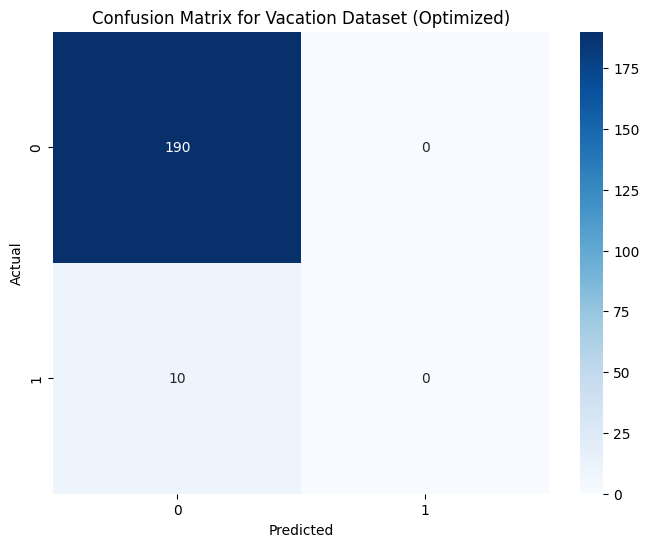

In [27]:
# Визуализация матрицы ошибок
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_vacation, y_pred_vacation_opt), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Vacation Dataset (Optimized)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Результаты кросс-валидации с пятью фолдами подтверждают высокую обобщающую способность модели для датасета о раке молочной железы, достигая точности на уровне 96.26%. После применения решетчатого поиска для оптимизации гиперпараметров, лучшие значения, такие как 'max_depth': None, 'min_samples_split': 2 и 'n_estimators': 200, позволили увеличить точность до 96.49%. Это улучшение на 0.23% подчеркивает важность тщательной настройки параметров модели для достижения ее оптимальной производительности.

В отношении модели для датасета о типах отпусков, она продемонстрировала точность на уровне 92%. Однако, анализ матрицы ошибок выявил, что 8% объектов были неверно классифицированы, особенно в отношении объектов класса 1. Дополнительный отчет о классификации указывает на высокую точность (93%) для класса 0, но нулевую точность для класса 1. Это может свидетельствовать о трудностях модели в правильной классификации объектов класса 1, что требует дополнительного анализа и улучшений.

Результаты перекрестной проверки с пятью фолдами для модели отпусков показывают оценки в диапазоне от 92% до 93%. Лучшие параметры, выявленные через решетчатый поиск, включают 'max_depth': None, 'min_samples_split': 4 и 'n_estimators': 100, что повысило точность до 93%.

В целом, проведенная перекрестная проверка для модели отпусков демонстрирует улучшение ее производительности с исходных 92% до 93%. Это подчеркивает стабильность модели и ее способность сохранять высокую точность на различных частях датасета.

В заключение, несмотря на высокую точность модели для датасета о раке молочной железы, следует учесть дисбаланс классов, который может влиять на обобщающую способность модели. Анализ метрик, таких как precision, recall и f1-score, особенно для менее представленного класса, поможет более полноценно оценить производительность модели.